# Data Set Building For Hidden Correlation Discovery

In [162]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
df = pd.read_csv('col_bus_sub_wifi_all_injured_and_all_killed.csv', header=None, sep=',')
df = df[[2,5,6,7]]
df[df > 1.0] = 1
#df[df < 1.0].count()
df[[2,5,6,7]].head(1)

,2,5,6,7
0,0,1,0,0


### Features:
### 2 is number of deaths (target variable)
### 5 is presence of bus stop within 25 meters to the collision location
### 6 is presence of subway entrance within 25 meters to the collision location
### 7 is presence of Lynk Wifi spot within 25 meters to the collision location

In [163]:
split = np.random.rand(len(df[[2,5,6,7]])) < .8
train = df[[2,5,6,7]][split]
test = df[[2,5,6,7]][~split]

## Decision Tree

In [164]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train.drop(2,1), train[[2]])

### AUC Plot:

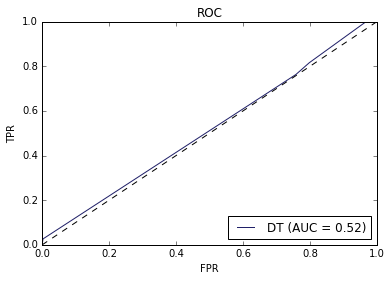

In [165]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline
def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

plotAUC(test[[2]], clf.predict_proba(test[[5,6,7]])[:,1], 'DT')  

plt.show()

### Feature Importance:

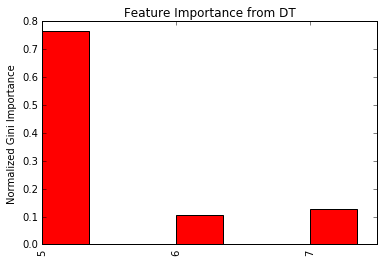

In [166]:
fig, ax = plt.subplots()
width=0.35
#ax.bar(train.drop(lab,1).columns.values, clf.feature_importances_, width, color='r')
ax.bar(np.arange(3), clf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train.drop(2,1).columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

## Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=500)
rf = rf.fit(train.drop(2, 1), train[2])
rf_pred = rf.predict_proba(test.drop(2,1))

### AUC Plot:

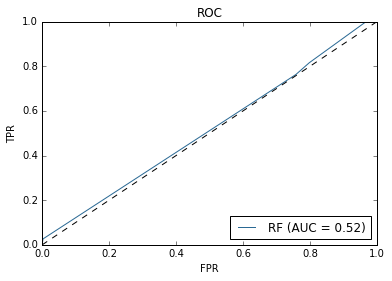

In [168]:
plotAUC(test[[2]], rf_pred[:,1], 'RF')  

plt.show()

### Feature Importance:

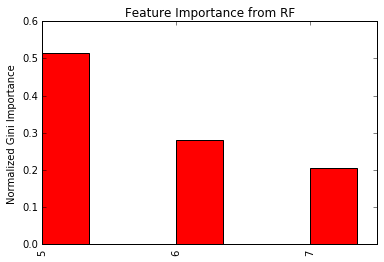

In [169]:
fig, ax = plt.subplots()
width=0.35
#ax.bar(train.drop(lab,1).columns.values, clf.feature_importances_, width, color='r')
ax.bar(np.arange(3), rf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(train.drop(2,1).columns.values,rotation=90)
plt.title('Feature Importance from RF')
ax.set_ylabel('Normalized Gini Importance')

# Adding Feature Schools

In [149]:
df2 = pd.read_csv('col_bus_sub_wifi_schools_each_injured_and_each_killed.csv', header=None, sep=',')
df2 = df2[[2,11,12,13,14]]
#df2.head(1)
df2[df2 > 1.0] = 1
#df2[df2 < 1.0].count()

### Features:
### 2 is number of deaths (target variable)
### 11 is presence of bus stop within 50 meters to the collision location
### 12 is presence of subway entrance within 50 meters to the collision location
### 13 is presence of Lynk Wifi spot within 50 meters to the collision location
### 14 is presence of Public Schools within 100 meters to the collision location

In [150]:
split2 = np.random.rand(len(df2[[2,11,12,13,14]])) < .8
train2 = df2[[2,11,12,13,14]][split2]
test2 = df2[[2,11,12,13,14]][~split2]

## Decision Tree

In [151]:
clf2 = DecisionTreeClassifier(criterion='entropy')
clf2 = clf2.fit(train2.drop(2,1), train2[[2]])

### AUC Plot:

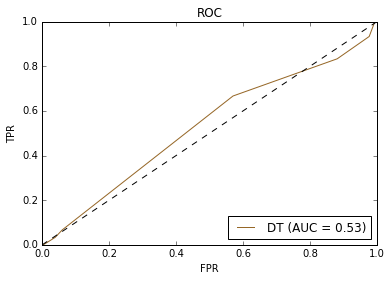

In [152]:
plotAUC(test2[[2]], clf2.predict_proba(test2[[11,12,13,14]])[:,1], 'DT')  

plt.show()

### Feature Importance:

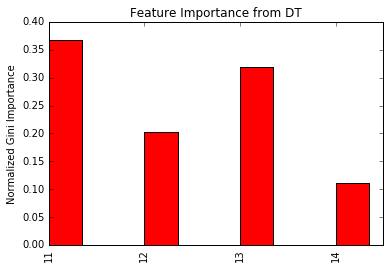

In [153]:
fig2, ax2 = plt.subplots()
width=0.35
#ax.bar(train.drop(lab,1).columns.values, clf.feature_importances_, width, color='r')
ax2.bar(np.arange(4), clf2.feature_importances_, width, color='r')
ax2.set_xticks(np.arange(len(clf2.feature_importances_)))
ax2.set_xticklabels(train2.drop(2,1).columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax2.set_ylabel('Normalized Gini Importance')

## Random Forest

In [154]:
rf2 = RandomForestClassifier(criterion='entropy', n_estimators=500)
rf2 = rf2.fit(train2.drop(2, 1), train2[2])
rf2_pred = rf2.predict_proba(test2.drop(2,1))

### AUC Plot:

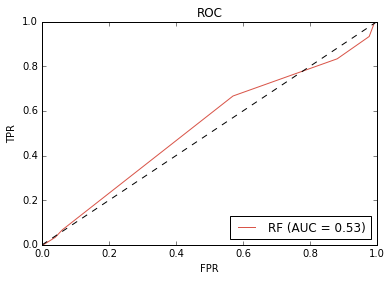

In [155]:
plotAUC(test2[[2]], rf2_pred[:,1], 'RF')  

plt.show()

### Feature Importance:

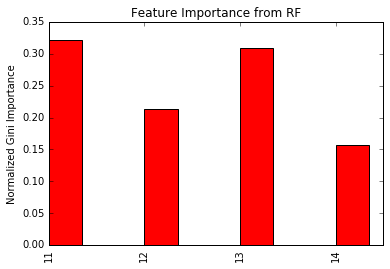

In [156]:
fig3, ax3 = plt.subplots()
width=0.35
#ax.bar(train.drop(lab,1).columns.values, clf.feature_importances_, width, color='r')
ax3.bar(np.arange(4), rf2.feature_importances_, width, color='r')
ax3.set_xticks(np.arange(len(clf2.feature_importances_)))
ax3.set_xticklabels(train2.drop(2,1).columns.values,rotation=90)
plt.title('Feature Importance from RF')
ax3.set_ylabel('Normalized Gini Importance')